In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns#가설검정 및 통계분석 패키지

matplotlib.rc('font',family='NanumGothic')
matplotlib.rc('axes',unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.environ["PATH"]

os.chdir(r"/home/piai/2023_권세영/수업 자료/bigdata/my_data/data_fine")
os.getcwd()
df_raw = pd.read_csv("./유방암.csv", encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
#목표변수 양성 1: 음성0
#설명변수, 목표변수 데이터 구분
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw.drop('diagnosis',axis = 1, inplace = False )

df_raw_y = df_raw['diagnosis']
df_raw_y  = pd.get_dummies(df_raw_y)
df_raw_y = df_raw_y['양성']
df_raw_y = df_raw_y.squeeze()

#데이터 분할 Train_test_split(X: t: 설명변수, Y:목표변수, test_size = test 데이터 비율)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,test_size=0.4,random_state = 1234)
print("분할 전 설명변수 데이터 : ", df_raw_x.shape)
print("분할 후 설명변수 데이터 : ", df_train_x.shape,df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 :  (192, 30) (128, 30)


## NN

In [9]:
from sklearn.neural_network import MLPClassifier

### 모델 생성

In [10]:
nn_uncustomized = MLPClassifier(random_state =1234)
nn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set : {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.599
Accuracy on test set : 0.758


In [11]:
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


### hidden layer : 은닉층 변경에 따른 모델 성능

In [6]:
train_accuracy = []; test_accuracy=[]

para_hidden = [5 * hidden for hidden in range(1, 21)]

for v_hidden in para_hidden:
    #nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) 히든 레이어 1개
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234) #히든 레이어 2개
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

In [7]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.599,0.758
1,10,0.594,0.750
2,15,0.401,0.242
3,20,0.901,0.875
4,25,0.870,0.898
5,30,0.599,0.758
6,35,0.932,0.914
7,40,0.599,0.758
8,45,0.938,0.938
9,50,0.932,0.906


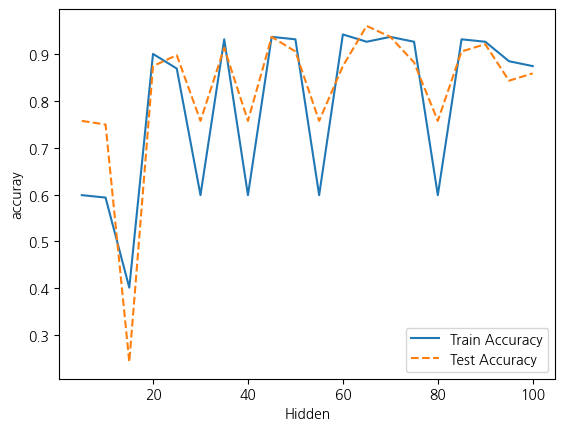

In [8]:
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("Hidden"); plt.ylabel("accuray")
plt.legend()

### Activation :활성화 함수에 따른 모델 성능

In [12]:
train_accuracy = []; test_accuracy=[]

para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    #nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) 히든 레이어 1개
    nn = MLPClassifier(activation= v_function, random_state = 1234) #히든 레이어 2개
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFrunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [13]:
df_accuracy_function.round(3)

,ActivationFrunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.898
1,tanh,0.943,0.906
2,relu,0.599,0.758


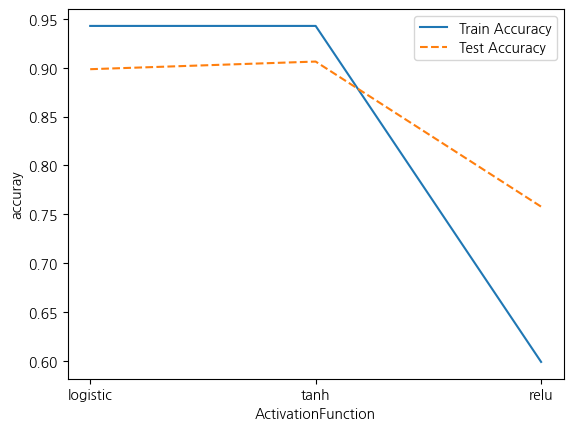

In [14]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("ActivationFunction"); plt.ylabel("accuray")
plt.legend()

**일정한 시간이 지난 후 테스트 성능이 더 높아지므로 활성함수는 넣지 않는다.**

### Standardscaler : 설명변수 scale 변경

In [15]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns =v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [18]:
#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state =1234)
print("train data X size :{}".format(df_scaled_train_x.shape))
print("test data X size :{}".format(df_scaled_test_x.shape))

train data X size :(192, 30)
test data X size :(128, 30)


### Scale 조정 후 새로운 모델 생성

In [19]:
nn_scaled = MLPClassifier(random_state =1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))

print("Accuracy on test set : {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set : 0.953


### Hidden layer 은닉층 변경에 따른 모델 성능

In [20]:
train_accuracy = []; test_accuracy=[]

para_hidden = [5 * hidden for hidden in range(1, 21)]

for v_hidden in para_hidden:
    #nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) 히든 레이어 1개
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234) #히든 레이어 2개
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

In [21]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.953,0.891
1,10,0.984,0.938
2,15,0.984,0.922
3,20,0.984,0.945
4,25,0.995,0.961
5,30,1.000,0.953
6,35,0.995,0.945
7,40,1.000,0.938
8,45,1.000,0.953
9,50,1.000,0.945


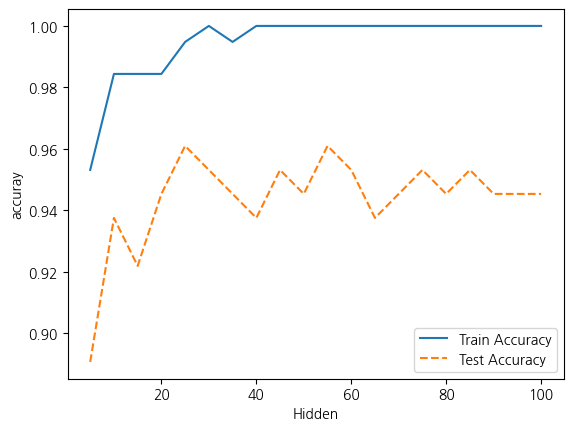

In [22]:
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("Hidden"); plt.ylabel("accuray")
plt.legend()

scale 후 그래프에서 히든이 55일때 테스트 값이 높으므로 55로 선택한다.

### Activation : 활성화 함수에 다른 모델 성능

In [26]:
train_accuracy = []; test_accuracy=[]

para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation= v_function, hidden_layer_sizes = (55,55), random_state = 1234) #히든 레이어 2개
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFrunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [27]:
df_accuracy_function.round(3)

,ActivationFrunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.938
1,tanh,1.000,0.945
2,relu,1.000,0.961


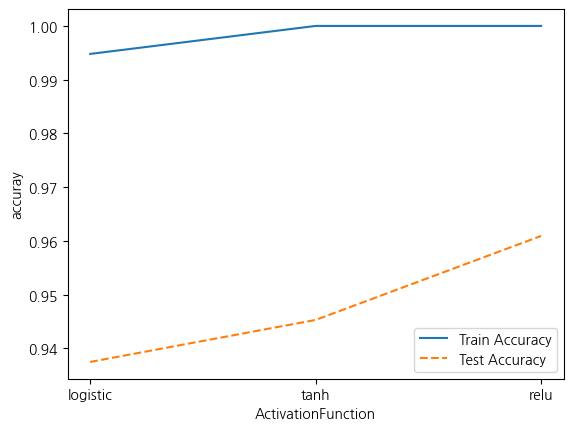

In [28]:
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("ActivationFunction"); plt.ylabel("accuray")
plt.legend()

activate == relu 로 선택

### Solver : 가중치 최적화 변경에 따른 모델 성능

In [30]:
train_accuracy = []; test_accuracy=[]

para_solver = ['lbfgs','sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation= "relu", hidden_layer_sizes = (55,55), random_state = 1234) #히든 레이어 2개
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

In [31]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.953
1,sgd,0.969,0.906
2,adam,1.000,0.961


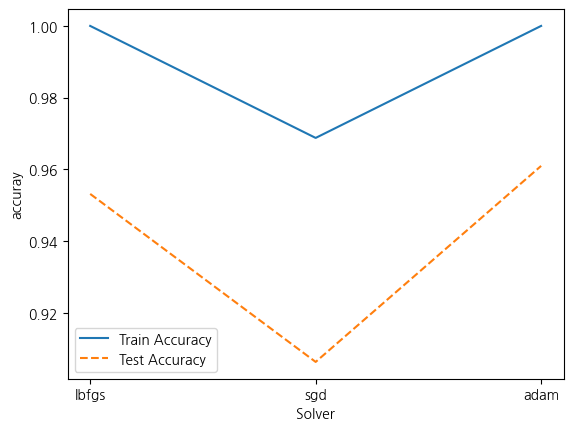

In [32]:
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("Solver"); plt.ylabel("accuray")
plt.legend()

Adam 일때 값의 차이가 적으므로 선택

### Mini Batch 변경에 따른 모델 성능

In [33]:
train_accuracy = []; test_accuracy=[]

para_batch = [batch*20 for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation= "relu", hidden_layer_sizes = (55,55), random_state = 1234) #히든 레이어 2개
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

In [34]:
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.961
1,40,1.0,0.961
2,60,1.0,0.961
3,80,1.0,0.961
4,100,1.0,0.961
5,120,1.0,0.961
6,140,1.0,0.961
7,160,1.0,0.961
8,180,1.0,0.961


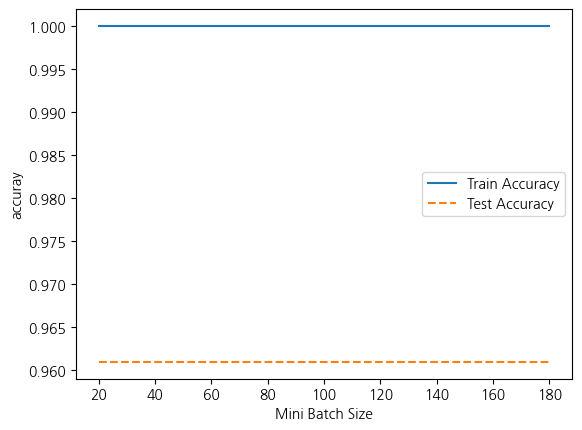

In [35]:
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("Mini Batch Size"); plt.ylabel("accuray")
plt.legend()

mini batch 로 인한 모델 성능이 변하지 않으므로 입력하지 않는다

### 최종 모델 선택

In [36]:
nn_final = MLPClassifier(solver = "adam", activation= "relu", hidden_layer_sizes = (55,55), random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set:{:.3f}\n'.format(nn_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}\n'.format(nn_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:1.000

Accuracy on test set:0.961

Confusion matrix:
[[92  5]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.948     0.974        97
           1      0.861     1.000     0.925        31

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



### 결론
최종모델에서는 adam, relu, hidden = 55, 55 선택하였다.

정확도는 0.961이고 채ㅜ려